In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!brew install wget

Running `brew update --auto-update`...
==> Homebrew collects anonymous analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (nor will be during this `brew` run).

==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
apify-cli                                libmapper
apprise                                  libxmlb
asn                                      llvm@16
bazel-diff                               mariadb@11.0
bazel-remote                             meson-python
biome                                    mfem
blake3                                   mgis
cargo-all-features                       modsecurity
cargo-binutils                           mtbl
cargo-deps                               orbiton
cargo-docset                       

In [6]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-24 19:29:01--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  6.04MB/s    in 0.2s    

2023-09-24 19:29:01 (6.04 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [245]:
housing = pd.read_csv('housing.csv') 

In [246]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

(array([   5.,    5.,    6.,   10.,   26.,   75.,  171.,  288.,  291.,
         350.,  389.,  275.,  362.,  473.,  518.,  470.,  381.,  394.,
         489.,  402.,  404.,  378.,  504.,  489.,  397.,  494.,  542.,
         615.,  447.,  439.,  407.,  454.,  489.,  357.,  287.,  276.,
         334.,  359.,  396.,  322.,  327.,  309.,  272.,  252.,  233.,
         232.,  250.,  243.,  241.,  190.,  188.,  171.,  133.,  116.,
         112.,  136.,  119.,  137.,  136.,  145.,  141.,  124.,  189.,
          99.,  113.,   99.,   91.,   70.,   71.,   63.,   75.,   71.,
          50.,   59.,   64.,   44.,   42.,   59.,   45.,   48.,   68.,
          35.,   37.,   26.,   29.,   32.,   26.,   24.,   22., 1012.]),
 array([ 14999.        ,  20387.91111111,  25776.82222222,  31165.73333333,
         36554.64444444,  41943.55555556,  47332.46666667,  52721.37777778,
         58110.28888889,  63499.2       ,  68888.11111111,  74277.02222222,
         79665.93333333,  85054.84444444,  90443.75555556,  

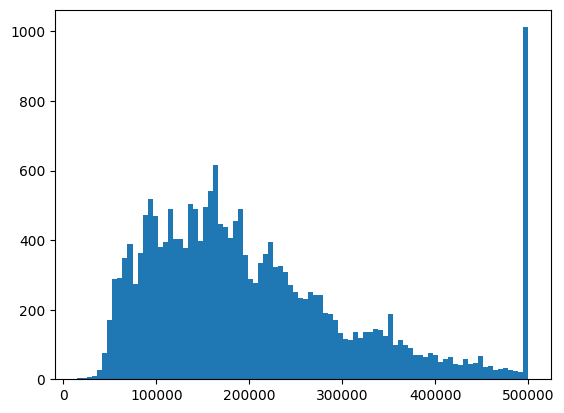

In [247]:
plt.hist(housing['median_house_value'], bins=90)

**Yes `median_house_value` has a big tail**

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [248]:
# Ocean conditions
ocean_condition_1 = (housing['ocean_proximity'] == 'INLAND')
ocean_condition_2 = (housing['ocean_proximity'] == '<1H OCEAN')
h2 = housing[ocean_condition_1 | ocean_condition_2]

In [249]:
h3 = h2[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`


In [250]:
print(h3.isnull().any() == True)

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool


**The feature `total_bedrooms` has missing values**

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [251]:
median_population = h3['population'].median()
print(f"The median population is: {median_population}")

The median population is: 1195.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [252]:
n = len(h3)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [253]:
df_train = h3.iloc[:n_train]
df_val = h3.iloc[n_train:n_train+n_val]
df_test = h3.iloc[n_train+n_val:]

In [254]:
idx = np.arange(n)

In [255]:
np.random.seed(42)
np.random.shuffle(idx)

In [256]:
df_train = h3.iloc[idx[:n_train]]
df_val = h3.iloc[idx[n_train:n_train+n_val]]
df_test = h3.iloc[idx[n_train+n_val:]]

In [257]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [258]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [259]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [260]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [261]:
def prepare_X(df, base, fill):
    df_num = df[base]
    if fill=="zeros":
        df_num = df_num.fillna(0)
    elif fill=="mean":
        df_num = df_num.fillna(df_num['total_bedrooms'].mean())
    X = df_num.values
    return X

In [262]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Adding the bias term
    X = np.column_stack([ones, X]) # Adding the bias term

    XTX = X.T.dot(X) # Gram matrix
    XTX_inv = np.linalg.inv(XTX) # Inverse of Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y_train) # All of our weights, including the bias term
    
    return w_full[0], w_full[1:]

In [263]:
# RMSE 
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [264]:
X_train = prepare_X(df_train, base, "zeros")
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, base, "zeros")
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.34

In [265]:
X_train = prepare_X(df_train, base, "mean")
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, base, "mean")
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

0.34

**Both RMSE are equally good**

/Users/elias/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-OlxYtftY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elias/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-OlxYtftY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/elias/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-OlxYtftY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(

<Axes: ylabel='Count'>

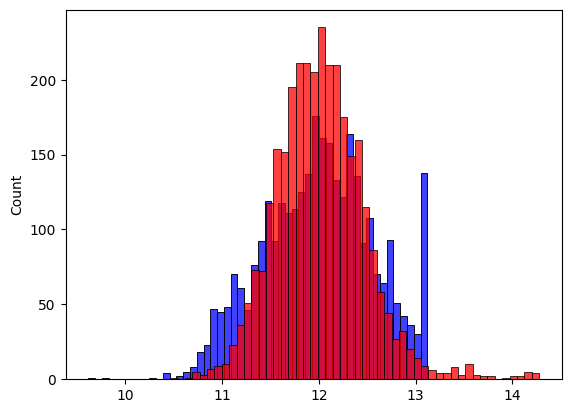

In [266]:
sns.histplot(y_val, color='blue', bins=50)
sns.histplot(y_pred, color='red', bins=50)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [267]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX) # Inverse of Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [268]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train, base, "zeros")
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, base, "zeros")
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w0, score)

0.0 -9.763249477872478 0.34
1e-05 -9.763043013681752 0.34
0.0001 -9.761185235634128 0.34
0.001 -9.742646249295081 0.34
0.1 -8.058889769412012 0.34
1 -3.1331542783180195 0.34
10 -0.43811723158933275 0.35


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [281]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:    

    ## Splitting:
    n = len(h3)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    ## Shuffle index:
    idx = np.arange(n)
    np.random.seed(seed=seed)
    np.random.shuffle(idx)

    ## New dfs with random variables:
    df_train = h3.iloc[idx[:n_train]]
    df_val = h3.iloc[idx[n_train:n_train+n_val]]
    df_test = h3.iloc[idx[n_train+n_val:]]

    ## Re-indexing:
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    ## Logs:
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    ## Cleaning:
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    ## Running model:
    X_train = prepare_X(df_train, base, "zeros")
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, base, "zeros")
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(seed, score)
    scores.append(score)

print(round(np.std(scores),3))

0 0.33773871600432287
1 0.3377999353665378
2 0.3384287006753424
3 0.3320049468303904
4 0.3394451862555888
5 0.34338197052659847
6 0.33853302117699496
7 0.34687476972995657
8 0.35127368659627967
9 0.33415582665206545
0.005



### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [293]:
## Splitting:
n = len(h3)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

## Shuffle index:
idx = np.arange(n)
np.random.seed(9) # Using seed = 9
np.random.shuffle(idx)

## New dfs with random variables:
df_train = h3.iloc[idx[:n_train]]
df_val = h3.iloc[idx[n_train:n_train+n_val]]
df_test = h3.iloc[idx[n_train+n_val:]]

## Re-indexing:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [294]:
## Combine training and validation datasets
df_train_val = pd.concat([df_train, df_val], ignore_index=True)

In [296]:
## Logs:
y_train_val = np.log1p(df_train_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

## Run the model:
X_train_val = prepare_X(df_train_val, base, "zeros")
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test, base, "zeros")
y_pred = w0 + X_test.dot(w)

round(rmse(y_test, y_pred),2)

0.33